# Machine Learning Engineer Capstone Proposal

## Build a Stock Price Predictor 

### 1. Domain Background

Many investment firms have been using financial models for predicting stock prices to yield profits.  

#### 1.1 Random Walk Theory

Random walk theory states that the changes in stock prices are unpredictable regardless of the past movements which imply that the uncertainty of a stock price going up is equal to going down(Malkiel 1973; “Eugene Famaâs Efficient Market Hypothesis,” n.d.)(Malkiel 1973). This important financial theory got its name from a book (A Random Walk Down Wall Street) which was written by Burton Malkiel in 1973.

#### 1.2 Efficient Market Hypothesis

Random walk theory was later superseded and explained by the efficient market hy(Malkiel 1973)pothesis.  According to the efficient market hypothesis, it is impossible to "beat the market" because the stocks are priced accurately and reflect all available information (“Eugene Famaâs Efficient Market Hypothesis,” n.d.).   As per this hypothesis, investors are taking a gamble when they buy or sell a security as there is no guarantee they could buy a stock at a bargain price and sell at a much higher price to make a profit. This implies that investors have to buy a higher risk investment to make profits. However many investors (most notably Warren Buffet) have made profits consistently over a substantial span of time. 

#### 1.3 Fundamental Analysis

Fundamental Analysis is a complete top to the bottom approach where the analysts tend to study all factors that could influence the stock's value. They are the overall economy, country's economy, sector analysis and company analysis. With the help of fundamental analysis, investors should be able to compare the current price of a stock against their own calculated intrinsic value which could possibly give them a good indication of whether a stock is undervalued or overvalued.

#### 1.4 Technical Analysis

The purpose of doing technical analysis is to predict a stock's price based on its past movements. Technical analysis assumes that the fundamental analysis has already been accounted for a company's current stock price.  This type of investment strategy is generally used by short-term investors, where holding periods could range anywhere from seconds to weeks.

### 2. Problem Statement

To build a stock price predictor that makes use of past trading data to produce projected estimates. For this purpose, I would be using supervised learning regression algorithms because the output to be predicted is a continuous value. The dataset that would be used to develop the machine learning model will predict the Adjusted Close price of a stock, which is a numerical value. The prediction would be made for the next day’s Adjusted Close Price.

### 3. Datasets and Inputs

The dataset would contain multiple metrics ( like Open, Close) including Adjusted Close Price that provides enough information about a particular stock. Using these metrics we can build the features that are necessary to predict the outcome. These metrics are numerical values. To get the input dataset, Yahoo Finance is being considered as it is easy to download the dataset for a particular stock. We only need to type the stock ticker symbol and then choose historical data tab to download the dataset. Ideally we would prefer to make use of past data for 25 years because technical analysis is based on the assumption that history tends to repeat itself, but this can be decided only after analysing the model performance because adding more training data doesn't make sense for a model which may have high variance. So I would start with small sample for example let’s say 1 or 2 years (probably from Jan 2015 to Dec 2017) and then see how it goes. There will no randomization as this is time-series data. Dates for the testing set will fall after the training set in order to avoid lookahead bias. Number of rows will vary depending on the stock ticker data because certain companies may have data starting from a different year (like 2002, 1997). AAPL, BRK-B, AMZN are some of the stock tickers that are being considered but however this might change. Technical Indicators like rolling mean and Bollinger Bands(upper and lower bands) are being considered for building features. Rolling window of 20 days is being considered to calculate the above mentioned technical indicators. 


In [5]:
import pandas as pd
import util as ut
import visuals as vs

start_date = "2017-01-01"
end_date = "2017-12-31"
dates = pd.date_range(start_date, end_date)
symbols = ["AAPL", "MSFT", "BRK-B"]
data = ut.get_data(symbols, dates)
data.head(n=7)

,AAPL,MSFT,BRK-B
2017-01-03,114.311760,61.213192,163.830002
2017-01-04,114.183815,60.939304,164.080002
2017-01-05,114.764473,60.939304,163.300003
2017-01-06,116.043915,61.467510,163.410004
2017-01-09,117.106812,61.271881,162.020004
2017-01-10,117.224907,61.252316,161.470001
2017-01-11,117.854782,61.809868,162.229996


In [12]:
data_AAPL = data.drop(["MSFT", "BRK-B"], axis=1)
data_AAPL = data_AAPL.rename(columns={'AAPL': "Adj Close"})
rm, rm_std, upper_band, lower_band  = ut.get_rolling_stats(data_AAPL)
data_AAPL['Moving Average'] = rm
data_AAPL['Upper Band'] = upper_band
data_AAPL['Lower Band'] = lower_band
# data_AAPL.head(n=25)

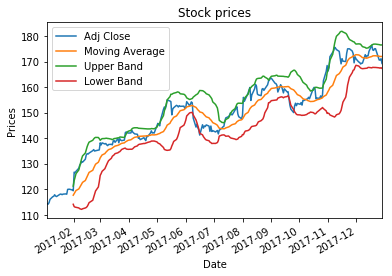

In [13]:
vs.plot_data(data_AAPL)

In [15]:
data_AAPL['NextDayPrice'] = data_AAPL['Adj Close'].shift(-1)
data_AAPL.tail()

,Adj Close,Moving Average,Upper Band,Lower Band,NextDayPrice
2017-12-22,175.009995,172.242000,176.812796,167.671203,170.570007
2017-12-26,170.570007,172.066000,176.608173,167.523828,170.600006
2017-12-27,170.600006,171.942500,176.504007,167.380994,171.080002
2017-12-28,171.080002,172.022501,176.456504,167.588497,169.229996
2017-12-29,169.229996,171.891500,176.498405,167.284595,NaN





### 4. Solution Statement

Using the metrics that come with the dataset we can build the features that are necessary to train the model. For features, I would be considering all the metrics that are in the dataset except Adjusted Close price. As mentioned earlier, I would be using many supervised learning regression algorithms to train the model as output to be predicted is a continuous value.

### 5. Benchmark Model

Simple linear regression machine learning model is the benchmark that I would be comparing to the solution model to prove that this problem is solvable.

### 6. Evaluation Metrics

Coefficient of Determination (r^2) explains the proportion of the variance in the dependent variable that is predictable from the independent variable. R2 score could be calculated using the predicted adjusted close price and the actual adjusted close price to quantify the performance of both the benchmark model and the solution model.

### 7. Project Design

To build stock predictor, I would develop training and prediction interfaces. Both the interfaces would accept a list of stock ticker symbols and date ranges as inputs. The training interface would build the necessary the model while the prediction interface would predict the outcome. Date ranges that should be given for the prediction interface should fall after date ranges given in the training interface. Rolling mean and Bollinger Bands(upper and lower bands) would be calculated and used for building features. As a part of data preprocessing step the features need to be normalized in order to ensure that all the features are given equal important. For this purpose MinMaxScaler function from sklearn library is being considered. After normalizing all the numerical features, we then need split the dataset into training and testing sets in order to avoid bias. For this project we are trying to predicting continuous value on time-series dataset so we need to avoid look ahead bias. Dates for the testing set will fall after the training set in order to avoid lookahead bias and no randomization. Support Vector Regressor, Random Forest Regressor are some of the algorithms that I would like to explore to build the solution model. 
